# Datafun-07-ml

# Introduction

Garrett Beaver

Project repository: <https://github.com/GarrettBeaver/datafun-07-ml>

In [87]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line

In [88]:
#convert Fahrenheit to Celsius 
c = lambda f: 5 / 9 * (f - 32)

#create a set of equivalent temperatures 
temps = [(f, c(f)) for f in range(0, 101, 10)]


Plot the Celsius/Fahrenheit pairs

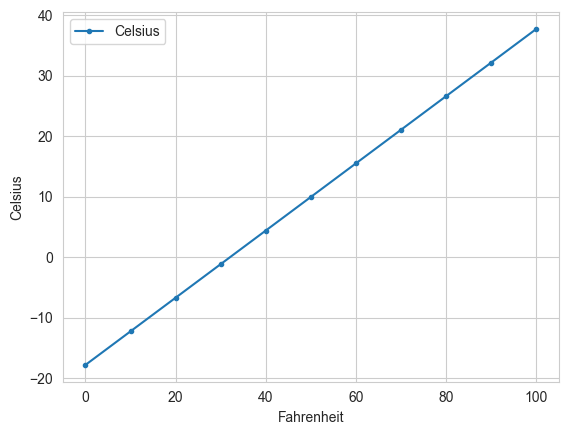

In [89]:
#create data frame 
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [90]:
# Loading the Average High Temperatures into a DataFrame
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')




### Section 2 - Data Inspection

In [91]:
# View data frame
df.head()

df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [92]:
#Change column names 
df.columns = ['Date', 'Temperature', 'Anomaly']

#make the date readable
df.Date = df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [93]:
pd.set_option('display.precision', 2)

df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [94]:
#create the dataframe linear regression
linear_regression = stats.linregress(x=df.Date,
                                     y=df.Temperature)

print(f" Slope:{linear_regression.slope}")

print(f"Intercept: {linear_regression.intercept}")



 Slope:0.014771361132966163
Intercept: 8.694993233674289


### Section 6 - Predict

In [95]:
print(f"Prediction for 2024: {linear_regression.slope * 2024 + linear_regression.intercept} Degrees F")

Prediction for 2024: 38.5922281667978 Degrees F


### Section 7 - Visualizations

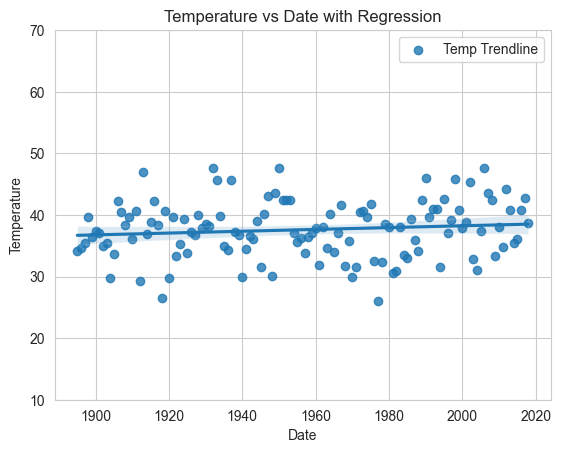

In [96]:
sns.set_style('whitegrid')

axes = sns.regplot(x=df.Date, y=df.Temperature, label='Temp Trendline')
#change y axis limits
axes.set_ylim(10, 70)
#set title
axes.set_title('Temperature vs Date with Regression')

plt.legend()

plt.show()

## Part 3 - Prediction

### Section 1 - Build the Model

In [100]:
#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(
     df.Date.values.reshape(-1, 1), df.Temperature.values, 
     random_state=11)

print(X_train.shape)

print(X_test.shape)

(93, 1)
(31, 1)


In [104]:
#train the model
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

print(f"Coef_ is {linear_regression.coef_}")

print(f"Intercept is: {linear_regression.intercept_}")

Coef_ is [0.01939167]
Intercept is: -0.30779820252656975


### Section 2 - Test the Model

In [106]:
predicted = linear_regression.predict(X_test)

expected = y_test
#show some of the predictions 
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [107]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

predict(2024)

array([38.94094855])